# Part 1

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
# we read in the file
doc = pd.read_json('/Users/irislu/Downloads/ultimate_challenge/logins.json')
doc


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [137]:
# no nan value and it's all datetime64 type. good to go.
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [138]:
#set index to date so better for resampling later
doc_ = doc.set_index('login_time')

In [139]:
#sum of the count later will be the count
doc_['counts'] = 1

In [140]:
#count for every 15 min
doc_15m = doc_.resample('15T',label = 'right').sum()
doc_15m

,counts
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1
...,...
1970-04-13 18:00:00,5
1970-04-13 18:15:00,5
1970-04-13 18:30:00,2


In [141]:
# go back to doc, we can extract the all the time element in this time stamps
doc['counts'] = 1
doc['month'] = doc.login_time.dt.month
doc['day'] = doc.login_time.dt.day
doc['hour'] = doc.login_time.dt.hour
doc['week_num'] = doc.login_time.dt.week
doc['weekday'] = doc.login_time.dt.weekday

doc

,login_time,counts,month,day,hour,week_num,weekday
0,1970-01-01 20:13:18,1,1,1,20,1,3
1,1970-01-01 20:16:10,1,1,1,20,1,3
2,1970-01-01 20:16:37,1,1,1,20,1,3
3,1970-01-01 20:16:36,1,1,1,20,1,3
4,1970-01-01 20:26:21,1,1,1,20,1,3
...,...,...,...,...,...,...,...
93137,1970-04-13 18:50:19,1,4,13,18,16,0
93138,1970-04-13 18:43:56,1,4,13,18,16,0
93139,1970-04-13 18:54:02,1,4,13,18,16,0
93140,1970-04-13 18:57:38,1,4,13,18,16,0


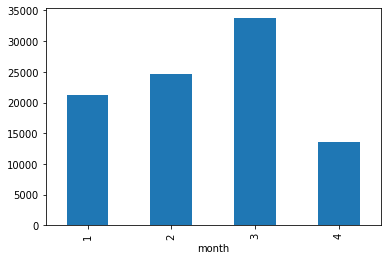

In [142]:
#let's see which month got the most sign-in
#because there are only 3.5 month data, the lowest number in April does not mean people don't sign in in April less
# we need more data to confirm that
doc.groupby('month')['counts'].sum().plot(kind='bar')

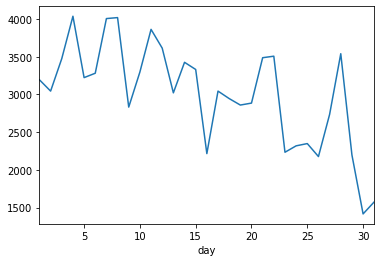

In [143]:
#let's see which days in a month got the most sign-ins
# we can see a pattern and it may come from weekday vs weekend. We can dig deeper later when we study on the weekdays. 
#the main reason of 30th and 31st getting the lowest sign-ins should be there are only Jan 30th, Jan 31st, Mar 30th, 
#Mar 31st in the data.
doc.groupby('day')['counts'].sum().plot()

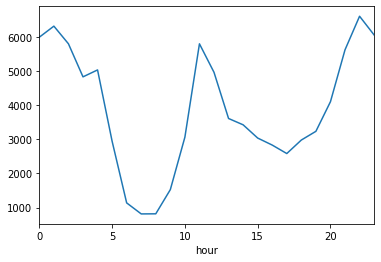

In [144]:
#now it is time to study the hour cycle
#there is seem to be a normal pattern here: around 7:30 am, people starts loggin in and got to a peak near 11 am - 12am
# around 5 pm, sign-in counts fall to the bottom. There may be a shift at night since the counts increase after 5 pm and 
#gets to the top around 10 pm and fall to the lowest point around 7 am
doc.groupby('hour')['counts'].sum().plot()

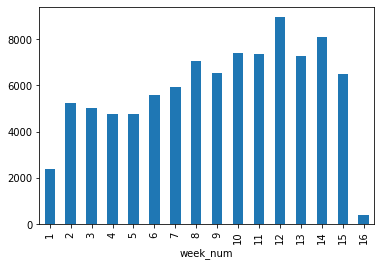

In [145]:
#the counts got to a pear at the 12th week. 
doc.groupby('week_num')['counts'].sum().plot(kind='bar')

In [146]:
# we can see that the week 1 only has 4 days and week 16 only has 1 day.
doc[doc.week_num == 15]

,login_time,counts,month,day,hour,week_num,weekday
86247,1970-04-06 00:02:01,1,4,6,0,15,0
86257,1970-04-06 00:00:33,1,4,6,0,15,0
86258,1970-04-06 00:04:52,1,4,6,0,15,0
86259,1970-04-06 00:10:05,1,4,6,0,15,0
86260,1970-04-06 00:03:44,1,4,6,0,15,0
...,...,...,...,...,...,...,...
92742,1970-04-12 23:46:42,1,4,12,23,15,6
92743,1970-04-12 23:51:35,1,4,12,23,15,6
92746,1970-04-12 23:47:17,1,4,12,23,15,6
92747,1970-04-12 23:52:13,1,4,12,23,15,6


In [147]:
doc[doc.week_num == 2]

,login_time,counts,month,day,hour,week_num,weekday
2372,1970-01-05 00:00:45,1,1,5,0,2,0
2375,1970-01-05 00:13:59,1,1,5,0,2,0
2376,1970-01-05 00:05:26,1,1,5,0,2,0
2377,1970-01-05 00:05:43,1,1,5,0,2,0
2378,1970-01-05 00:08:29,1,1,5,0,2,0
...,...,...,...,...,...,...,...
7586,1970-01-11 23:54:04,1,1,11,23,2,6
7587,1970-01-11 23:59:43,1,1,11,23,2,6
7589,1970-01-11 23:55:47,1,1,11,23,2,6
7591,1970-01-11 23:57:16,1,1,11,23,2,6


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

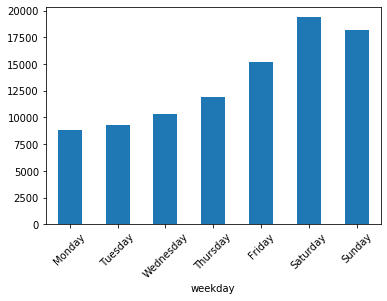

In [153]:
# we can see people sign on the most during Saturdays and Sundays.
ax = doc.groupby('weekday')['counts'].sum().plot(kind='bar')
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])
plt.xticks(rotation=45)

Summary:
    
1. There is a strong hourly cycle daily. There should be some day and night work shift so there is the same pattern during normal working hours and night time.

2. There is a trend that the sign-in counts go slightly down towards the end of the month but we need more data to prove it

3. There is an obvious trend the log-in counts increase from Monday to Friday, reach peak on Saturday and comes slightly down on Sunday.



# Part II

1. The metrics I will choose is:
i. the times a driver going across the bridge/the toll reimbursement a driver reported to the company
ii. the revenue earned by the drivers who take advantage of the reimbursement.
I chose this two metrics because first we have to measure if the driver will take advantage of this new reimbursement benefit at all. This will be measured by i.As a common sense, as long as the driver go across the bridge, they will ask for reimbursement for the toll so measuring the toll fee on their toll fee tag account serves the same purpose here.
As a company, the ultimate goal is not to encourge the drives just driving around but to encourage them to go to the areas that have more passengers and make more money. If the extra money made for getting more passengers is more than the toll fee reimbursed, then it is a good plan. This concern for profit is being measured in ii.

2. a. Randomly choose 500(or a fraction of the driver population) drivers and notify them that for the next month they will be reimbursed for all the toll fee and that they are encouraged to go outside local area to get more passengers. We will call this group 'group A'. We will randomly find another group of drivers of the same number and call them ’group B'. Group B has no benefit and know nothing about the plan. The assumption is that in group A, more Metropolis local driver will go to Gotham during night and more Gotham local drivers will go to Metropolis during daytime.

b. We will contact 2 A/b tests. For i, the null hypothesis is that there is no significant difference between the toll fee spent by group A and group B within the same 30 days of time.
For ii, the null hypothesis is that there is no significant difference between the revenue earned by group A and group B within the same 30 days of time. 

We will use the permutation test on the daily toll fee and daily revenue of the two groups and see the p value of when the daily toll fee and revenue of group A is bigger than group B. If the p value is small enough, like smaller than 5%, then we  can reject the null hypothesis and say that there the rembursement plan did encourage the drivers to drive around and get more customers.

c. If the p value is not small enough to reject the null hypothesis, I will not rush to conclusion that the proposal is useless. Some drivers in group A may not fully aware what the reimbursement plan means and may be confused. Some drivers have their own routine so it takes some time for them to hang out in a new area. Some drivers don't know where they can get more customers in a new area, so the revenue does not seem to increase that much. For issues like this, operation manager really have to talk to the group A drivers or do some survey to see what the problems are.

Even if the p is small enough, it does not mean it is pratically siginificant to make the change. The accounting department and operation department should sit together and see if the increased revenue can cover the increased toll fee in a long run.



In [68]:
import json
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold


from sklearn.metrics import accuracy_score,f1_score,roc_auc_score

In [103]:


with open('/Users/irislu/Downloads/ultimate_challenge/ultimate_data_challenge.json') as json_file:
    json_data = json.load(json_file)


In [15]:
df = pd.DataFrame(json_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [19]:
# we can see there are a fraction of data are missing in avg_rating_of_driver,phone and avg_rating_by_driver columns. 
# we will use the mean od the two rating columns to fill the Nan and drop the Nan in phone column cause there is no
#way we can indicate if iphone or android was used. The droppped rows only take up 0.8% of the whole records count
#so it won't be much an impact on the result

df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(),inplace=True)
df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean(),inplace=True)
df.dropna(inplace=True)

In [20]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [21]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

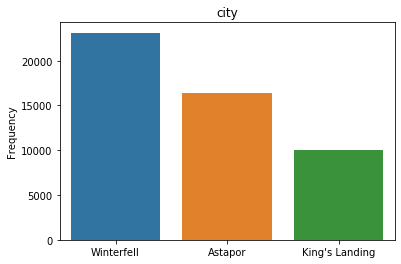

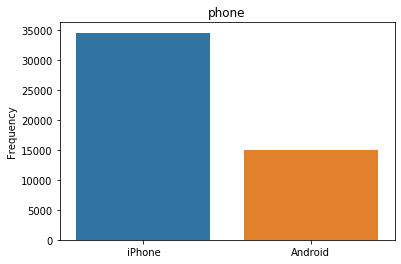

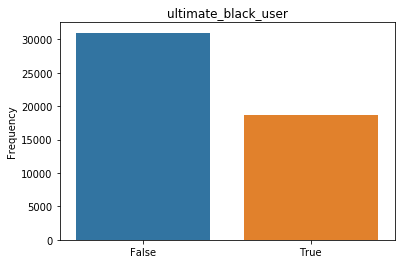

In [52]:
#plot the categorical features 
cat_features = ['city', 'phone', 'ultimate_black_user']

for feature in cat_features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
   

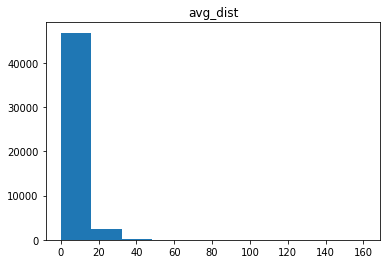

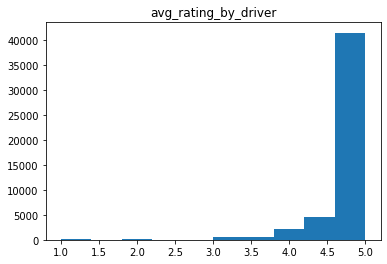

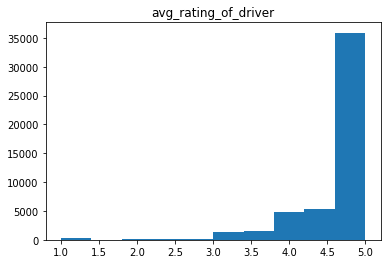

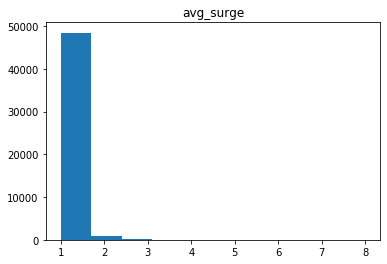

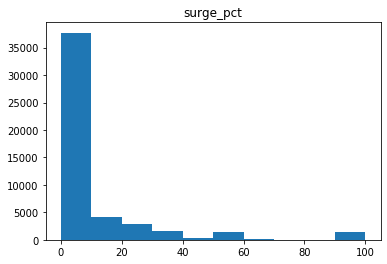

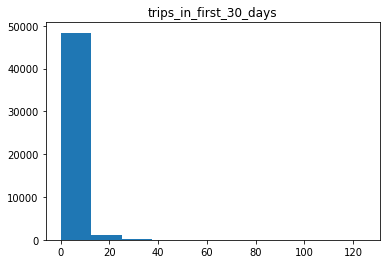

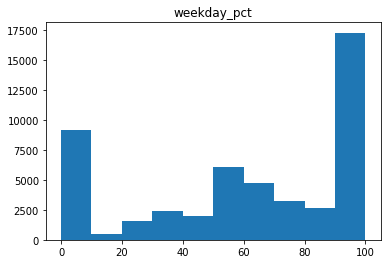

In [24]:
# we plot all the numerical features and we can see that other than weekday_pct that has two local maxiams, all the other
#features have a very limited range of distribution.

num_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

for feature in num_features:
    plt.hist(df[feature])
    plt.title(feature)
    plt.show()

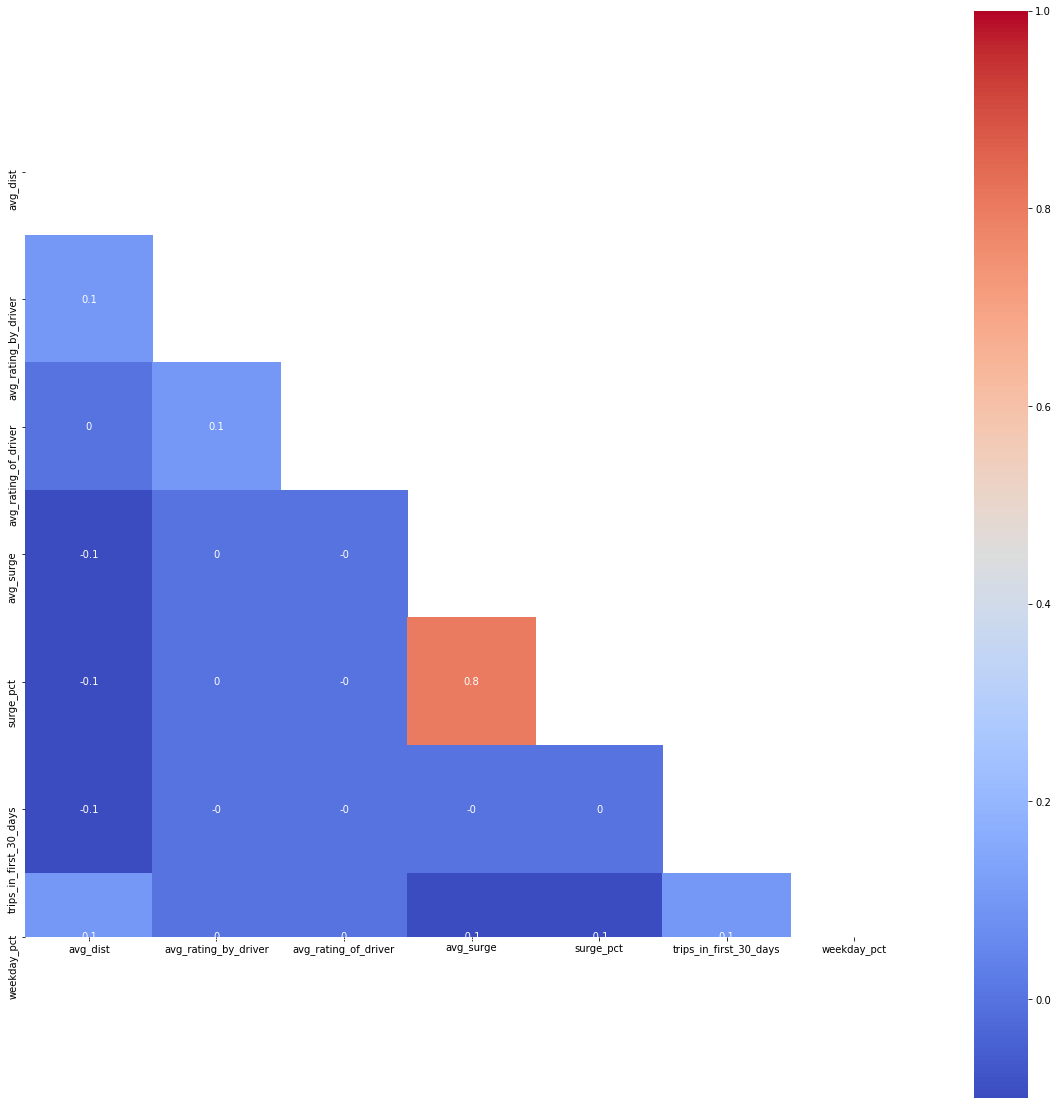

In [43]:
#let's see the correlation between the attributes to see if there are collinearity.
corr = round(df[num_features].corr(),1)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(corr, mask=mask,square=True,annot=True,cmap='coolwarm',ax=ax)
plt.show()

In [ ]:
#let's see the correlation between the attributes to see if there are collinearity.
corr = round(df.corr(),1)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(corr, mask=mask,square=True,annot=True,cmap='coolwarm',ax=ax)
plt.show()

In [34]:
#we can see the latest date of last_trip_date is 7/1, which means this data was collected on 7/1 and we have to look at
# how many customers are active within 30 days before 7/1 to determine the retain rate
df.sort_values(by=['last_trip_date']).tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
45516,King's Landing,2,2014-01-25,4.4,1.14,2014-07-01,Android,17.9,False,83.9,2.32,4.8
12139,King's Landing,16,2014-01-18,4.9,1.02,2014-07-01,Android,3.9,False,74.0,2.64,4.8
18814,Astapor,3,2014-01-10,4.7,1.02,2014-07-01,iPhone,3.2,False,67.7,6.22,4.8
12085,Winterfell,1,2014-01-24,4.7,1.04,2014-07-01,iPhone,15.4,True,38.5,6.80,4.9
31587,Winterfell,12,2014-01-19,4.9,1.07,2014-07-01,iPhone,6.0,True,70.0,5.63,4.7


In [37]:
# we can see the customers that are active in June and July is 37.64%, which is the retain rate so far.
len(df[df.last_trip_date >= '2014-06-01'])/len(df)*100

37.640109668575114

In [40]:
# all the customers in the dataset signed up in Jan so 6th month will be June, we should be able to include July 1st
#here since customers signed up in Jan on different days.
df['active'] = (df.last_trip_date >= '2014-06-01')*1
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [42]:
# Creating dummy variables for categorical features
df_ = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)
df_

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,2014-01-25,4.700000,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,1,0,1,1
1,0,2014-01-29,5.000000,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,0,0,0,0
2,3,2014-01-06,4.300000,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,0,0,1,0
3,9,2014-01-10,4.600000,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,1,0,1,1
4,14,2014-01-27,4.400000,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.000000,1.00,2014-06-05,0.0,100.0,5.63,4.2,1,1,0,1,0
49996,1,2014-01-24,4.601559,1.00,2014-01-25,0.0,0.0,0.00,4.0,0,0,0,1,0
49997,0,2014-01-31,5.000000,1.00,2014-05-22,0.0,100.0,3.86,5.0,0,0,1,0,1
49998,2,2014-01-14,3.000000,1.00,2014-01-15,0.0,100.0,4.58,3.5,0,0,0,1,0


In [94]:

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=24)
for train_index, test_index in split.split(df, df['active']):
    train_set = df_.loc[train_index]
    test_set = df_.loc[test_index]
    
X_train = train_set.drop(columns='active')
y_train = train_set['active']

    
X_test = test_set.drop(columns='active')
y_test = test_set['active']

X_train

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
32745,1.0,2014-01-06,4.601559,1.00,2014-01-11,0.0,0.0,9.16,5.0,0.0,0.0,0.0,0.0
20714,2.0,2014-01-19,4.500000,1.13,2014-05-18,16.7,16.7,4.50,4.4,0.0,0.0,0.0,0.0
42106,4.0,2014-01-17,4.600000,1.00,2014-06-24,0.0,62.2,5.27,4.8,0.0,1.0,1.0,0.0
23630,0.0,2014-01-18,4.000000,1.00,2014-05-07,0.0,100.0,25.51,5.0,0.0,0.0,1.0,1.0
19796,1.0,2014-01-21,4.601559,1.38,2014-03-19,50.0,100.0,8.96,5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,4.0,2014-01-31,5.000000,1.04,2014-04-06,16.7,33.3,4.41,4.3,0.0,1.0,1.0,0.0
31794,9.0,2014-01-11,4.800000,1.18,2014-06-21,23.5,61.8,3.60,5.0,1.0,0.0,0.0,1.0
34313,1.0,2014-01-21,4.601559,1.00,2014-01-28,0.0,100.0,2.70,5.0,0.0,1.0,0.0,0.0
20802,0.0,2014-01-23,4.601559,1.38,2014-05-27,50.0,50.0,3.72,5.0,0.0,0.0,0.0,0.0


In [95]:
# we build a pipleine to scale the numerical columns, since the categorical columns are all good, we will pass them 
#through. We will drop the two date columns here automatically

pipeline = ColumnTransformer([('num',StandardScaler(),num_features),
                              ('cat', 'passthrough',[9,10,11,12])])
X_train_ = pipeline.fit_transform(X_train)

assert (len(X_train_[0])== (len(X_train.columns)-2)),'something wrong with the column number!'

In [96]:
# we will choose various models here to make do training. We will include simple logistic regression model to more 
#complex xgboost model. 
#For evaluation metrics, company wants to accurately predict who will be active at the 6th month so we will use 
#accuracy as main metric here, at the same time, we will look at ROC AUC and f1 score as well to make sure
#accuracy paradox won't happen here

xgb_clf = XGBClassifier(random_state = 24)

svm_clf = SVC(random_state = 24)

log_clf = LogisticRegression(n_jobs=-1,random_state = 24)

rf_clf = RandomForestClassifier(random_state=24)

models_dict = {}

models_dict['Extreme Gradient Boosting'] = xgb_clf
models_dict['Logistic Regression'] = log_clf
models_dict['Random Forest'] = rf_clf
models_dict['SVM'] = svm_clf


In [97]:
def select_model(X, y, models, k_folds):
    model_results = {}
    
    for model_name, model in models.items():
        metrics = {}
        
        cv = StratifiedKFold(n_splits=k_folds)
        
        accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        
        metrics['accuracy'] = np.mean(accuracy_scores)
        
        f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
        metrics['f1'] = np.mean(recall_scores)
        
        
        roc_auc_scores = cross_val_score(classifier_pipeline,X, y, cv=cv, scoring='roc_auc')
        metrics['roc_auc_scores'] = np.mean(roc_auc_scores)
        
        model_results[model_name] = metrics
        
    return model_results

In [100]:
pd.DataFrame(select_model(X_train_, y_train, models=models_dict, k_folds=5))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [101]:
pd.DataFrame(X_train_).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39683 entries, 0 to 39682
Data columns (total 11 columns):
0     39352 non-null float64
1     39352 non-null float64
2     39352 non-null float64
3     39352 non-null float64
4     39352 non-null float64
5     39352 non-null float64
6     39352 non-null float64
7     39352 non-null float64
8     39352 non-null float64
9     39352 non-null float64
10    39352 non-null float64
dtypes: float64(11)
memory usage: 3.3 MB


In [90]:
np.any(np.isnan(X_train_))

True